# Machine Learning Coding Individual Task One
## ~ Lance Munyao, 150772

You are expected to use the provided Nairobi Office Price Ex dataset with one feature 𝑥 (office size) and one target 𝑦 (office price).

1. **Functions to Implement:**
   - Write two Python functions:
     - One for computing Mean Squared Error to be used as your Performance Measure Technique.
     - Another for Gradient Descent as your learning algorithm that can update weights (refer to class theory notes on these formulas).

2. **Model Training:**
   - Set random initial values for slope (m) and y-intercept (c).
   - Train an intelligent linear regression model of your dataset for 10 epochs by calling the above functions.
   - Show the error in every epoch.

3. **Visualization:**
   - Plot the line of best fit after the final epoch.

4. **Prediction:**
   - Use your above learnt line to predict the office price when the size is 100 sq. ft.

## Libraries
The following libraries are used in this notebook:

- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib` and `seaborn` for data visualization

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

The dataset is loaded from `data.csv` and contains the following columns:

- `LOC`: Location of the office
- `FUR`: Whether the office is furnished
- `AMB`: Ambiance of the office
- `PROX_SCH`: Proximity to schools
- `PROX_ROAD`: Proximity to roads
- `PROX_MALL`: Proximity to malls
- `WATER`: Availability of water
- `HK_SER`: Availability of housekeeping services
- `SIZE`: Size of the office in square feet
- `PRICE`: Price of the office


In [26]:
df = pd.read_csv("data.csv")
df

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


## Loading the Data

We load the dataset from `data.csv` and extract the `SIZE` and `PRICE` columns for our analysis.

In [27]:
feature_x = df['SIZE']
target_y = df['PRICE']

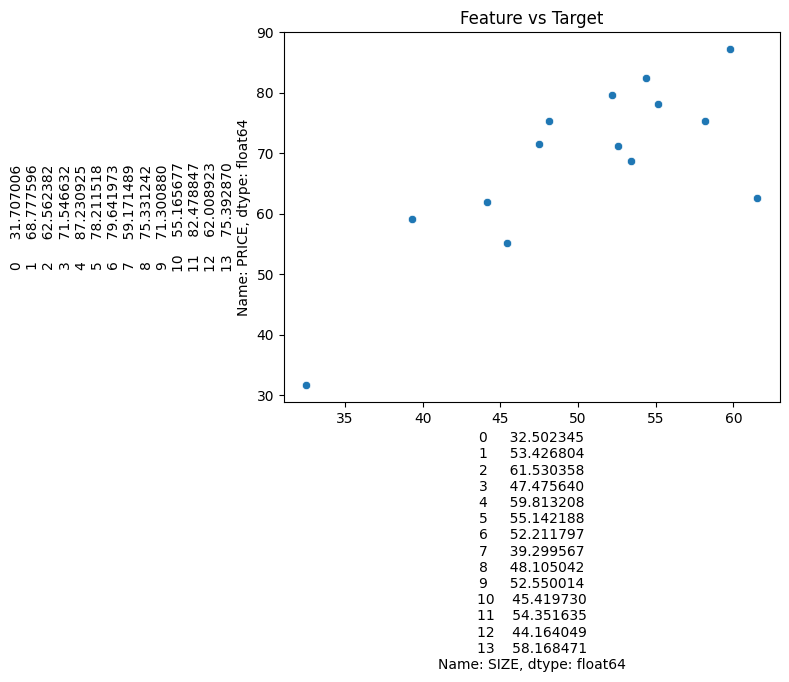

In [28]:
sns.scatterplot(x=feature_x, y=target_y)
plt.xlabel(feature_x)
plt.ylabel(target_y)
plt.title('Feature vs Target')
plt.show()

## Mean Squared Error Function

Defining a function to compute the Mean Squared Error (MSE), which will be used for the performance measure technique.

In [29]:
def mean_square_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

## Gradient Descent Function

Defining a function to perform gradient descent, which will be used as for the learning algorithm to update the weights (slope and intercept) of the linear regression model.

In [30]:
def gradient_descent(feature_x, target_y, learning_rate, epochs):
    m = len(target_y)
    # Initialize random values for slope (m) and y-intercept (c)
    slope = np.random.randn()
    intercept = np.random.randn()
    
    for epoch in range(epochs):
        # Predict the target values
        y_pred = slope * feature_x + intercept
        
        # Calculate the error
        error = y_pred - target_y
        
        # Calculate the gradients
        slope_gradient = (2/m) * np.dot(feature_x, error)
        intercept_gradient = (2/m) * np.sum(error)
        
        # Update the weights
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
        # Calculate and print the mean squared error
        mse = mean_square_error(target_y, y_pred)
        print(f"Epoch {epoch+1}, Mean Squared Error: {mse}")
    
    return slope, intercept

## Training the Model

Initializing random values for the slope (`m`) and y-intercept (`c`) and train the model for 10 epochs. The error is displayed for each epoch.


In [31]:
learning_rate = 0.0001
epochs = 10

In [32]:
slope, intercept = gradient_descent(feature_x, target_y, learning_rate, epochs)

Epoch 1, Mean Squared Error: 3442.389923684274
Epoch 2, Mean Squared Error: 856.4765327330776
Epoch 3, Mean Squared Error: 256.415730873545
Epoch 4, Mean Squared Error: 117.17171420828801
Epoch 5, Mean Squared Error: 84.86016105177862
Epoch 6, Mean Squared Error: 77.36226946193997
Epoch 7, Mean Squared Error: 75.62238418882136
Epoch 8, Mean Squared Error: 75.21864338815112
Epoch 9, Mean Squared Error: 75.12495470501663
Epoch 10, Mean Squared Error: 75.10321356765824


## Plotting the Line of Best Fit

After training the model, plot the line of best fit along with the data points to visualize the results.


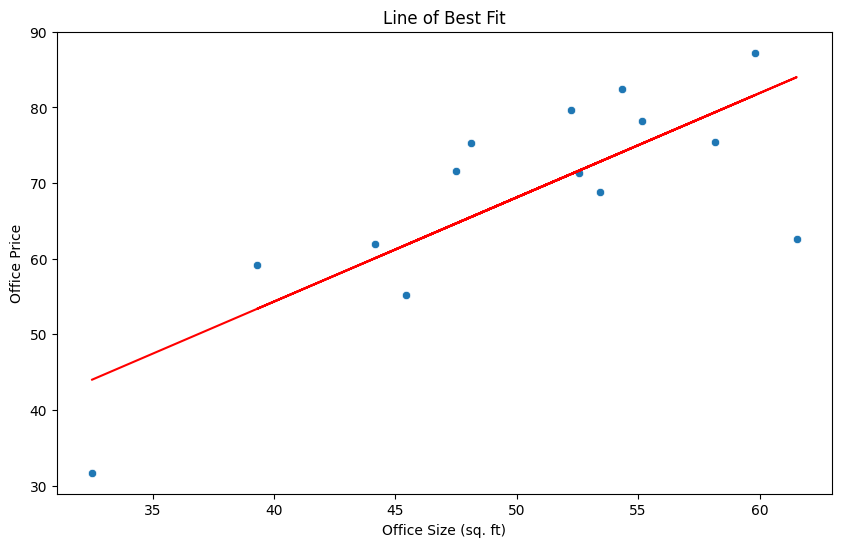

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_x, y=target_y)
plt.plot(feature_x, slope * feature_x + intercept, color='red')
plt.xlabel('Office Size (sq. ft)')
plt.ylabel('Office Price')
plt.title('Line of Best Fit')
plt.show()

## Prediction

Finally, we use the trained model to predict the office price for an office size of 100 square feet.


In [34]:
size = 100
predicted_price = slope * size + intercept
print(f"Predicted office price for size {size} sq. ft: {predicted_price}")

Predicted office price for size 100 sq. ft: 136.9915447431647


## Conclusion

This notebook demonstrates a simple implementation of linear regression using gradient descent. The model is trained on a small dataset and provides a basic understanding of how linear regression works.